In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

file_path = "Quality of Service 5G.csv"
df = pd.read_csv(file_path)

df.head(), df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


(        Timestamp User_ID   Application_Type Signal_Strength Latency  \
 0  9/3/2023 10:00  User_1         Video_Call         -75 dBm   30 ms   
 1  9/3/2023 10:00  User_2         Voice_Call         -80 dBm   20 ms   
 2  9/3/2023 10:00  User_3          Streaming         -85 dBm   40 ms   
 3  9/3/2023 10:00  User_4  Emergency_Service         -70 dBm   10 ms   
 4  9/3/2023 10:00  User_5      Online_Gaming         -78 dBm   25 ms   
 
   Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
 0            10 Mbps             15 Mbps                 70%  
 1           100 Kbps            120 Kbps                 80%  
 2             5 Mbps              6 Mbps                 75%  
 3             1 Mbps            1.5 Mbps                 90%  
 4             2 Mbps              3 Mbps                 85%  ,
 None,
              Timestamp User_ID Application_Type Signal_Strength Latency  \
 count              400     400              400             400     400   
 unique         

In [21]:
def convert_to_bps(value):
    value = str(value).strip().lower()
    if 'kbps' in value:
        return float(value.replace('kbps', '').strip()) * 1000 
    elif 'mbps' in value:
        return float(value.replace('mbps', '').strip()) * 1000000
    else:
        return float(value)

df['Required_Bandwidth'] = df['Required_Bandwidth'].apply(convert_to_bps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].apply(convert_to_bps)

print(df[['Required_Bandwidth', 'Allocated_Bandwidth']].head())


   Required_Bandwidth  Allocated_Bandwidth
0          10000000.0           15000000.0
1            100000.0             120000.0
2           5000000.0            6000000.0
3           1000000.0            1500000.0
4           2000000.0            3000000.0


In [22]:
from datetime import datetime
import re
from sklearn.preprocessing import StandardScaler

df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%m/%d/%Y %H:%M")

def extract_numerical(value):
    return float(re.findall(r"[-+]?\d*\.\d+|\d+", str(value))[0]) if re.findall(r"[-+]?\d*\.\d+|\d+", str(value)) else None

numerical_columns = ["Signal_Strength", "Latency", "Required_Bandwidth", "Allocated_Bandwidth", "Resource_Allocation"]
for col in numerical_columns:
    df[col] = df[col].apply(extract_numerical)

df = pd.get_dummies(df, columns=["Application_Type"], drop_first=True)

df.drop(columns=["User_ID"], inplace=True)

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

X = df.drop(columns=["Allocated_Bandwidth"])
y = df["Allocated_Bandwidth"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## CNN - LSTM Hybrid model

Epoch 1/1000


/Users/rashmi/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8718 - mae: 0.6500 - val_loss: 0.8919 - val_mae: 0.7039
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5272 - mae: 0.4748 - val_loss: 0.8601 - val_mae: 0.6876
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1790 - mae: 0.2881 - val_loss: 0.9657 - val_mae: 0.7021
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0595 - mae: 0.1798 - val_loss: 0.8942 - val_mae: 0.6928
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0359 - mae: 0.1370 - val_loss: 0.9006 - val_mae: 0.6975
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0359 - mae: 0.1160 - val_loss: 0.8657 - val_mae: 0.6884
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0259 - mae: 0.1163 - val_loss: 0.8716 - val_mae: 0.6785
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - mae: 0.0882 - val_loss: 0.8477 - val_mae: 0.6696
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 - 

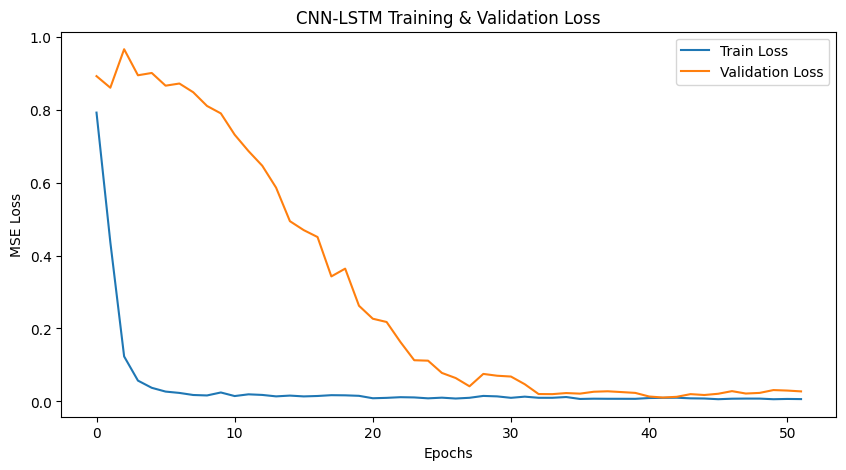

CNN-LSTM model saved successfully as 'cnn_lstm_model.h5'


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

if "Timestamp" in X_train.columns:
    X_train = X_train.drop(columns=["Timestamp"])
    X_test = X_test.drop(columns=["Timestamp"])

X_train_reshaped = np.expand_dims(X_train.values.astype(np.float32), axis=-1)
X_test_reshaped = np.expand_dims(X_test.values.astype(np.float32), axis=-1)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


cnn_lstm_model = Sequential([
    # CNN Layer First
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    # LSTM Layer
    LSTM(50, return_sequences=True),
    LSTM(25),
    
    # Fully connected layers
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)  # Output layer for regression
])

cnn_lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,         
    restore_best_weights=True,
    verbose=1
)

history = cnn_lstm_model.fit(X_train_reshaped, 
                            y_train, 
                            epochs=1000, 
                            batch_size=16, 
                            validation_data=(X_test_reshaped, y_test), 
                            verbose=1,
                            callbacks=[early_stopping])

cnn_lstm_eval = cnn_lstm_model.evaluate(X_test_reshaped, y_test)

print(f"Test Loss (MSE): {cnn_lstm_eval[0]}")
print(f"Test MAE: {cnn_lstm_eval[1]}")

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

y_pred_cnn_lstm_scaled = cnn_lstm_model.predict(X_test_reshaped)

y_pred_cnn_lstm_unscaled = scaler.inverse_transform(y_pred_cnn_lstm_scaled)
y_test_unscaled = scaler.inverse_transform(y_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_cnn_lstm_unscaled = mean_squared_error(y_test_unscaled, y_pred_cnn_lstm_unscaled)
mae_cnn_lstm_unscaled = mean_absolute_error(y_test_unscaled, y_pred_cnn_lstm_unscaled)

print(f"CNN-LSTM Model MSE: {mse_cnn_lstm_unscaled}")
print(f"CNN-LSTM Model MAE: {mae_cnn_lstm_unscaled}")

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

cnn_lstm_model.save("models/cnn_lstm_model.h5")
print("CNN-LSTM model saved successfully as 'cnn_lstm_model.h5'")


In [24]:
import time
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

custom_objects = {
    "mse": MeanSquaredError(),
    "mae": MeanAbsoluteError()
}

model_path = "models/cnn_lstm_model.h5"
cnn_lstm_model = load_model(model_path, custom_objects=custom_objects)
print("CNN-LSTM model loaded successfully!")

def measure_inference_time(model, sample_input, num_runs=100):
    start_time = time.time()
    for _ in range(num_runs):
        _ = model.predict(sample_input, verbose=0)
    end_time = time.time()

    avg_time_per_inference = (end_time - start_time) / num_runs * 1000
    return avg_time_per_inference


sample_input = X_test.values[:1]
sample_input = sample_input.astype(np.float32)  
sample_input = np.expand_dims(sample_input, axis=-1)

# Measure inference time
inference_time = measure_inference_time(cnn_lstm_model, sample_input)

# Get model size in MB
model_size = os.path.getsize(model_path) / (1024 * 1024)  # Convert bytes to MB

# Print results
print(f"Average Inference Time: {inference_time:.4f} ms")
print(f"Model Size: {model_size:.4f} MB")


CNN-LSTM model loaded successfully!
Average Inference Time: 23.2810 ms
Model Size: 0.4487 MB


## Transformer for Time-Series

Data formatted for Transformer input
X_train shape: (320, 1, 14)
X_test shape: (80, 1, 14)
y_train shape: (320,)
y_test shape: (80,)


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 1, 14)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 14)     │     15,118 │ input_layer_8[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 1, 14)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 1, 14)     │          0 │ input_layer_8[0]… │
│                     │                   │            │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 14)     │         28 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 1, 64)     │        960 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 1, 14)     │        910 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 1, 14)     │          0 │ dense_27[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 1, 14)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 14)     │         28 │ add_5[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 14)        │          0 │ layer_normalizat… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 1)         │         15 │ get_item_1[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,059 (66.64 KB)

 Trainable params: 17,059 (66.64 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6659 - mae: 0.5824 - val_loss: 0.1109 - val_mae: 0.2641
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1709 - mae: 0.3194 - val_loss: 0.0582 - val_mae: 0.1590
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1118 - mae: 0.2361 - val_loss: 0.0415 - val_mae: 0.1237
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0801 - mae: 0.2055 - val_loss: 0.0329 - val_mae: 0.1269
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0649 - mae: 0.1915 - val_loss: 0.0302 - val_mae: 0.1219
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0509 - mae: 0.1724 - val_loss: 0.0203 - val_mae: 0.0975
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454 - mae: 0.1624 - val_loss: 0.0189 - val_mae: 0.0747
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0382 - mae: 0.1488 - val_loss: 0.0171 - val_mae: 0.0968
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

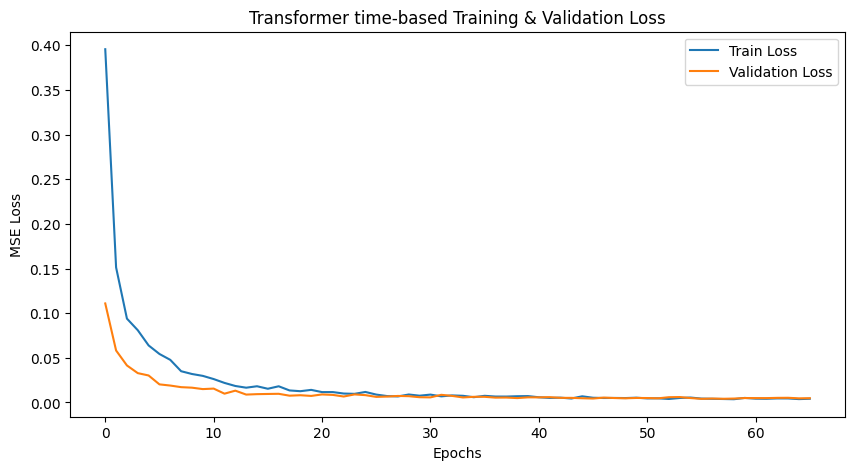

In [25]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Add
from tensorflow.keras.optimizers import Adam

if "Timestamp" in X_train.columns:
    X_train = X_train.drop(columns=["Timestamp"])
    X_test = X_test.drop(columns=["Timestamp"])

X_train_tst = X_train.values.astype(np.float32)
X_test_tst = X_test.values.astype(np.float32)
y_train_tst = y_train.astype(np.float32)
y_test_tst = y_test.astype(np.float32)

X_train_tst = np.expand_dims(X_train_tst, axis=1)
X_test_tst = np.expand_dims(X_test_tst, axis=1)


print("Data formatted for Transformer input")
print(f"X_train shape: {X_train_tst.shape}")
print(f"X_test shape: {X_test_tst.shape}")
print(f"y_train shape: {y_train_tst.shape}")
print(f"y_test shape: {y_test_tst.shape}")

def build_transformer_model(input_shape, num_heads=4, ff_dim=64, dropout_rate=0.1):

    inputs = Input(shape=input_shape)

    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    attn_output = Dropout(dropout_rate)(attn_output)
    attn_output = Add()([inputs, attn_output])
    attn_output = LayerNormalization()(attn_output)

    ffn_output = Dense(ff_dim, activation="relu")(attn_output)
    ffn_output = Dense(input_shape[-1])(ffn_output)
    ffn_output = Dropout(dropout_rate)(ffn_output)
    ffn_output = Add()([attn_output, ffn_output])
    ffn_output = LayerNormalization()(ffn_output)

    outputs = Dense(1)(ffn_output[:, -1, :])

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

    return model

input_shape = (X_train_tst.shape[1], X_train_tst.shape[2])

tst_model = build_transformer_model(input_shape)

print(tst_model.summary())

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,         
    restore_best_weights=True,
    verbose=1
)

history_tst = tst_model.fit(
    X_train_tst, y_train_tst,
    validation_data=(X_test_tst, y_test_tst),
    epochs=1000,
    batch_size=16,
    verbose=1,
    callbacks=[early_stopping]
)


tst_eval = tst_model.evaluate(X_test_tst, y_test_tst)

y_pred_tst_scaled = tst_model.predict(X_test_tst)
y_pred_tst_unscaled = scaler.inverse_transform(y_pred_tst_scaled)
y_test_tst_unscaled = scaler.inverse_transform(y_test_scaled)

tst_mse_unscaled = mean_squared_error(y_test_tst_unscaled, y_pred_tst_unscaled)
tst_mae_unscaled = mean_absolute_error(y_test_tst_unscaled, y_pred_tst_unscaled)

print(f"Transformer MSE: {tst_mse_unscaled:.6f}")
print(f"Transformer MAE: {tst_mae_unscaled:.6f}")

plt.figure(figsize=(10,5))
plt.plot(history_tst.history['loss'], label='Train Loss')
plt.plot(history_tst.history['val_loss'], label='Validation Loss')
plt.title('Transformer time-based Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


In [27]:
import time
import os

tst_model.save("models/transformer_tst_model.h5")
print("Transformer model saved successfully as 'transformer_tst_model.h5'")

def measure_inference_time(model, sample_input, num_runs=100):
    start_time = time.time()
    for _ in range(num_runs):
        _ = model.predict(sample_input, verbose=0)
    end_time = time.time()

    avg_time_per_inference = (end_time - start_time) / num_runs * 1000
    return avg_time_per_inference

sample_input = X_test_tst[:1]

inference_time_tst = measure_inference_time(tst_model, sample_input)

model_size_tst = os.path.getsize("models/transformer_tst_model.h5") / (1024 * 1024)

print(f"Transformer Model Inference Time: {inference_time_tst:.4f} ms")
print(f"Transformer Model Size: {model_size_tst:.4f} MB")


Transformer model saved successfully as 'transformer_tst_model.h5'
Transformer Model Inference Time: 21.0368 ms
Transformer Model Size: 0.2601 MB


## Temporal Fusion Transformer

Data formatted for Transformer input
X_train shape: (320, 1, 14)
X_test shape: (80, 1, 14)
y_train shape: (320,)
y_test shape: (80,)


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 1, 14)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 14)     │     15,118 │ input_layer_9[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 1, 14)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 1, 14)     │          0 │ input_layer_9[0]… │
│                     │                   │            │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 14)     │         28 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 1, 64)     │        960 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 1, 14)     │        910 │ dense_29[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 1, 14)     │          0 │ dense_30[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 1, 14)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_17[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 14)     │         28 │ add_7[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_14 (LSTM)      │ (None, 1, 50)     │     13,000 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_15 (LSTM)      │ (None, 25)        │      7,600 │ lstm_14[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 50)        │      1,300 │ lstm_15[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 25)        │      1,275 │ dense_31[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 1)         │         26 │ dense_32[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 40,245 (157.21 KB)

 Trainable params: 40,245 (157.21 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0196 - mae: 0.7521 - val_loss: 0.8284 - val_mae: 0.6900
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6228 - mae: 0.5469 - val_loss: 0.3375 - val_mae: 0.3556
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2689 - mae: 0.3132 - val_loss: 0.0322 - val_mae: 0.1361
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0319 - mae: 0.1433 - val_loss: 0.0180 - val_mae: 0.1039
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144 - mae: 0.0935 - val_loss: 0.0105 - val_mae: 0.0675
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096 - mae: 0.0722 - val_loss: 0.0081 - val_mae: 0.0573
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - mae: 0.0697 - val_loss: 0.0080 - val_mae: 0.0558
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - mae: 0.0602 - val_loss: 0.0091 - val_mae: 0.0574
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 -

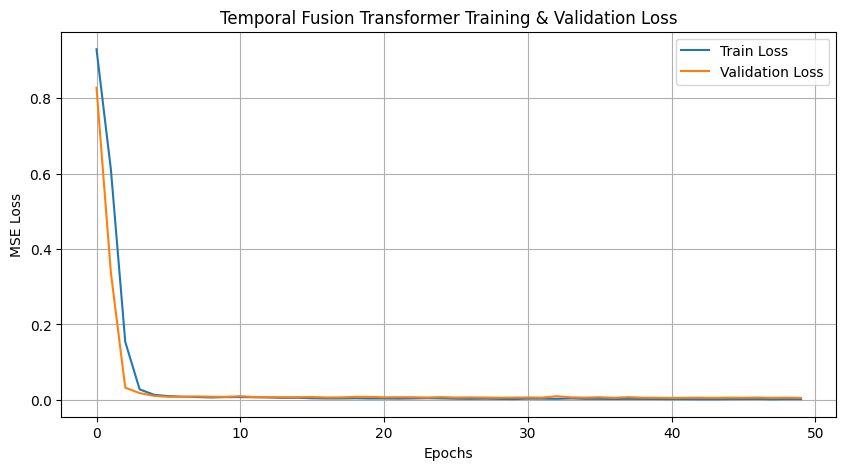

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Add, LSTM

import numpy as np

if "Timestamp" in X_train.columns:
    X_train = X_train.drop(columns=["Timestamp"])
    X_test = X_test.drop(columns=["Timestamp"])

X_train_tft = X_train.values.astype(np.float32)
X_test_tft = X_test.values.astype(np.float32)
y_train_tft = y_train.astype(np.float32)
y_test_tft = y_test.astype(np.float32)

X_train_tft = np.expand_dims(X_train_tft, axis=1)
X_test_tft = np.expand_dims(X_test_tft, axis=1)


print("Data formatted for Transformer input")
print(f"X_train shape: {X_train_tft.shape}")
print(f"X_test shape: {X_test_tft.shape}")
print(f"y_train shape: {y_train_tft.shape}")
print(f"y_test shape: {y_test_tft.shape}")


def build_tft_model(input_shape, num_heads=4, ff_dim=64, dropout_rate=0.1):
    inputs = Input(shape=input_shape)

    # Multi-Head Attention Layer
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    attn_output = Dropout(dropout_rate)(attn_output)
    attn_output = Add()([inputs, attn_output])  # Skip connection
    attn_output = LayerNormalization()(attn_output)

    # Gated Residual Network (GRN) Layer
    grn_output = Dense(ff_dim, activation="relu")(attn_output)
    grn_output = Dense(input_shape[-1])(grn_output)  # Match feature dimension
    grn_output = Dropout(dropout_rate)(grn_output)
    grn_output = Add()([attn_output, grn_output])  # Skip connection
    grn_output = LayerNormalization()(grn_output)

    # LSTM for Temporal Learning
    lstm_output = LSTM(50, return_sequences=True)(grn_output)
    lstm_output = LSTM(25)(lstm_output)

    # Fully Connected Layer
    dense_output = Dense(50, activation="relu")(lstm_output)
    dense_output = Dense(25, activation="relu")(dense_output)
    
    # Output layer for regression
    outputs = Dense(1)(dense_output)

    # Build and compile model
    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

    return model

input_shape = (X_train_tft.shape[1], X_train_tft.shape[2])

tft_model = build_tft_model(input_shape)

print(tft_model.summary())

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,         
    restore_best_weights=True,
    verbose=1
)

history_tft = tft_model.fit(
    X_train_tft, y_train_tft,
    validation_data=(X_test_tft, y_test_tft),
    epochs=50,
    batch_size=16,
    verbose=1,
    callbacks=[early_stopping]
)

tft_eval = tft_model.evaluate(X_test_tft, y_test_tft)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

y_pred_tft_scaled = tft_model.predict(X_test_tft)
y_pred_tft_unscaled = scaler.inverse_transform(y_pred_tft_scaled)
y_test_tft_unscaled = scaler.inverse_transform(y_test_scaled)

mse_tft_unscaled = mean_squared_error(y_test_tft_unscaled, y_pred_tft_unscaled)
mae_tft_unscaled = mean_absolute_error(y_test_tft_unscaled, y_pred_tft_unscaled)

print(f"TFT Model Unscaled MSE: {mse_tft_unscaled:.6f}")
print(f"TFT Model Unscaled MAE: {mae_tft_unscaled:.6f}")

plt.figure(figsize=(10,5))
plt.plot(history_tft.history['loss'], label='Train Loss')
plt.plot(history_tft.history['val_loss'], label='Validation Loss')
plt.title('Temporal Fusion Transformer Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
import time
import os

tft_model.save("models/tft_model.h5")
print("TFT model saved successfully as 'tft_model.h5'")

def measure_inference_time(model, sample_input, num_runs=100):
    start_time = time.time()
    for _ in range(num_runs):
        _ = model.predict(sample_input, verbose=0)
    end_time = time.time()

    avg_time_per_inference = (end_time - start_time) / num_runs * 1000
    return avg_time_per_inference

sample_input = X_test_tft[:1]

inference_time_tft = measure_inference_time(tft_model, sample_input)

model_size_tft = os.path.getsize("models/tft_model.h5") / (1024 * 1024)

print(f"TFT Model Inference Time: {inference_time_tft:.4f} ms")
print(f"TFT Model Size: {model_size_tft:.4f} MB")


TFT model saved successfully as 'tft_model.h5'
TFT Model Inference Time: 22.6398 ms
TFT Model Size: 0.5513 MB


## Models Comparision based on MAE and MSE

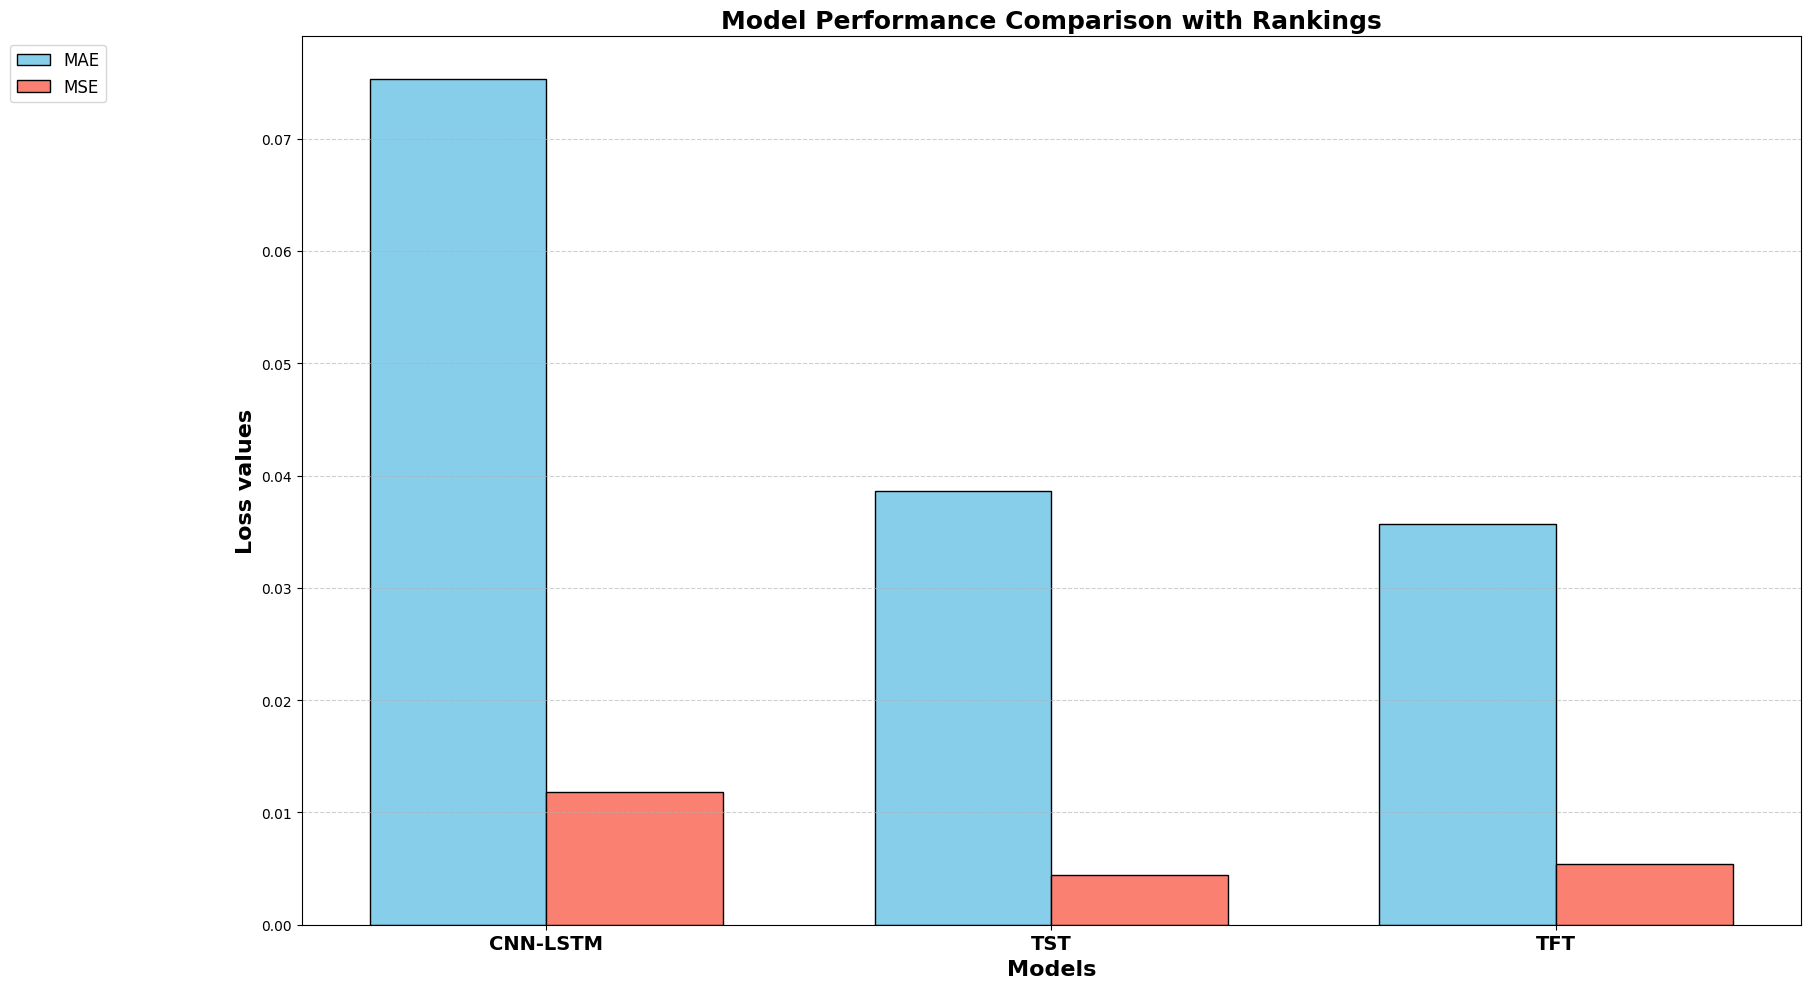

In [52]:
import numpy as np
import matplotlib.pyplot as plt

models = ["CNN-LSTM", "TST", "TFT"]
mae_values = [mae_cnn_lstm_unscaled, tst_mae_unscaled, mae_tft_unscaled]
mse_values = [mse_cnn_lstm_unscaled, tst_mse_unscaled, mse_tft_unscaled]

mae_ranks = np.argsort(mae_values) + 1
mse_ranks = np.argsort(mse_values) + 1

overall_ranks = np.array(mae_ranks) + np.array(mse_ranks)

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(18, 10))

bars1 = ax.bar(x - width/2, mae_values, width, label="MAE", color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, mse_values, width, label="MSE", color='salmon', edgecolor='black')

ax.set_ylabel("Loss values", fontsize=16, fontweight='bold')
ax.set_xlabel("Models", fontsize=16, fontweight='bold')
ax.set_title("Model Performance Comparison", fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=14, fontweight='bold')

ax.legend(fontsize=12, loc="upper left", bbox_to_anchor=(-0.2, 1))

ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


## Models Comparision based on model size

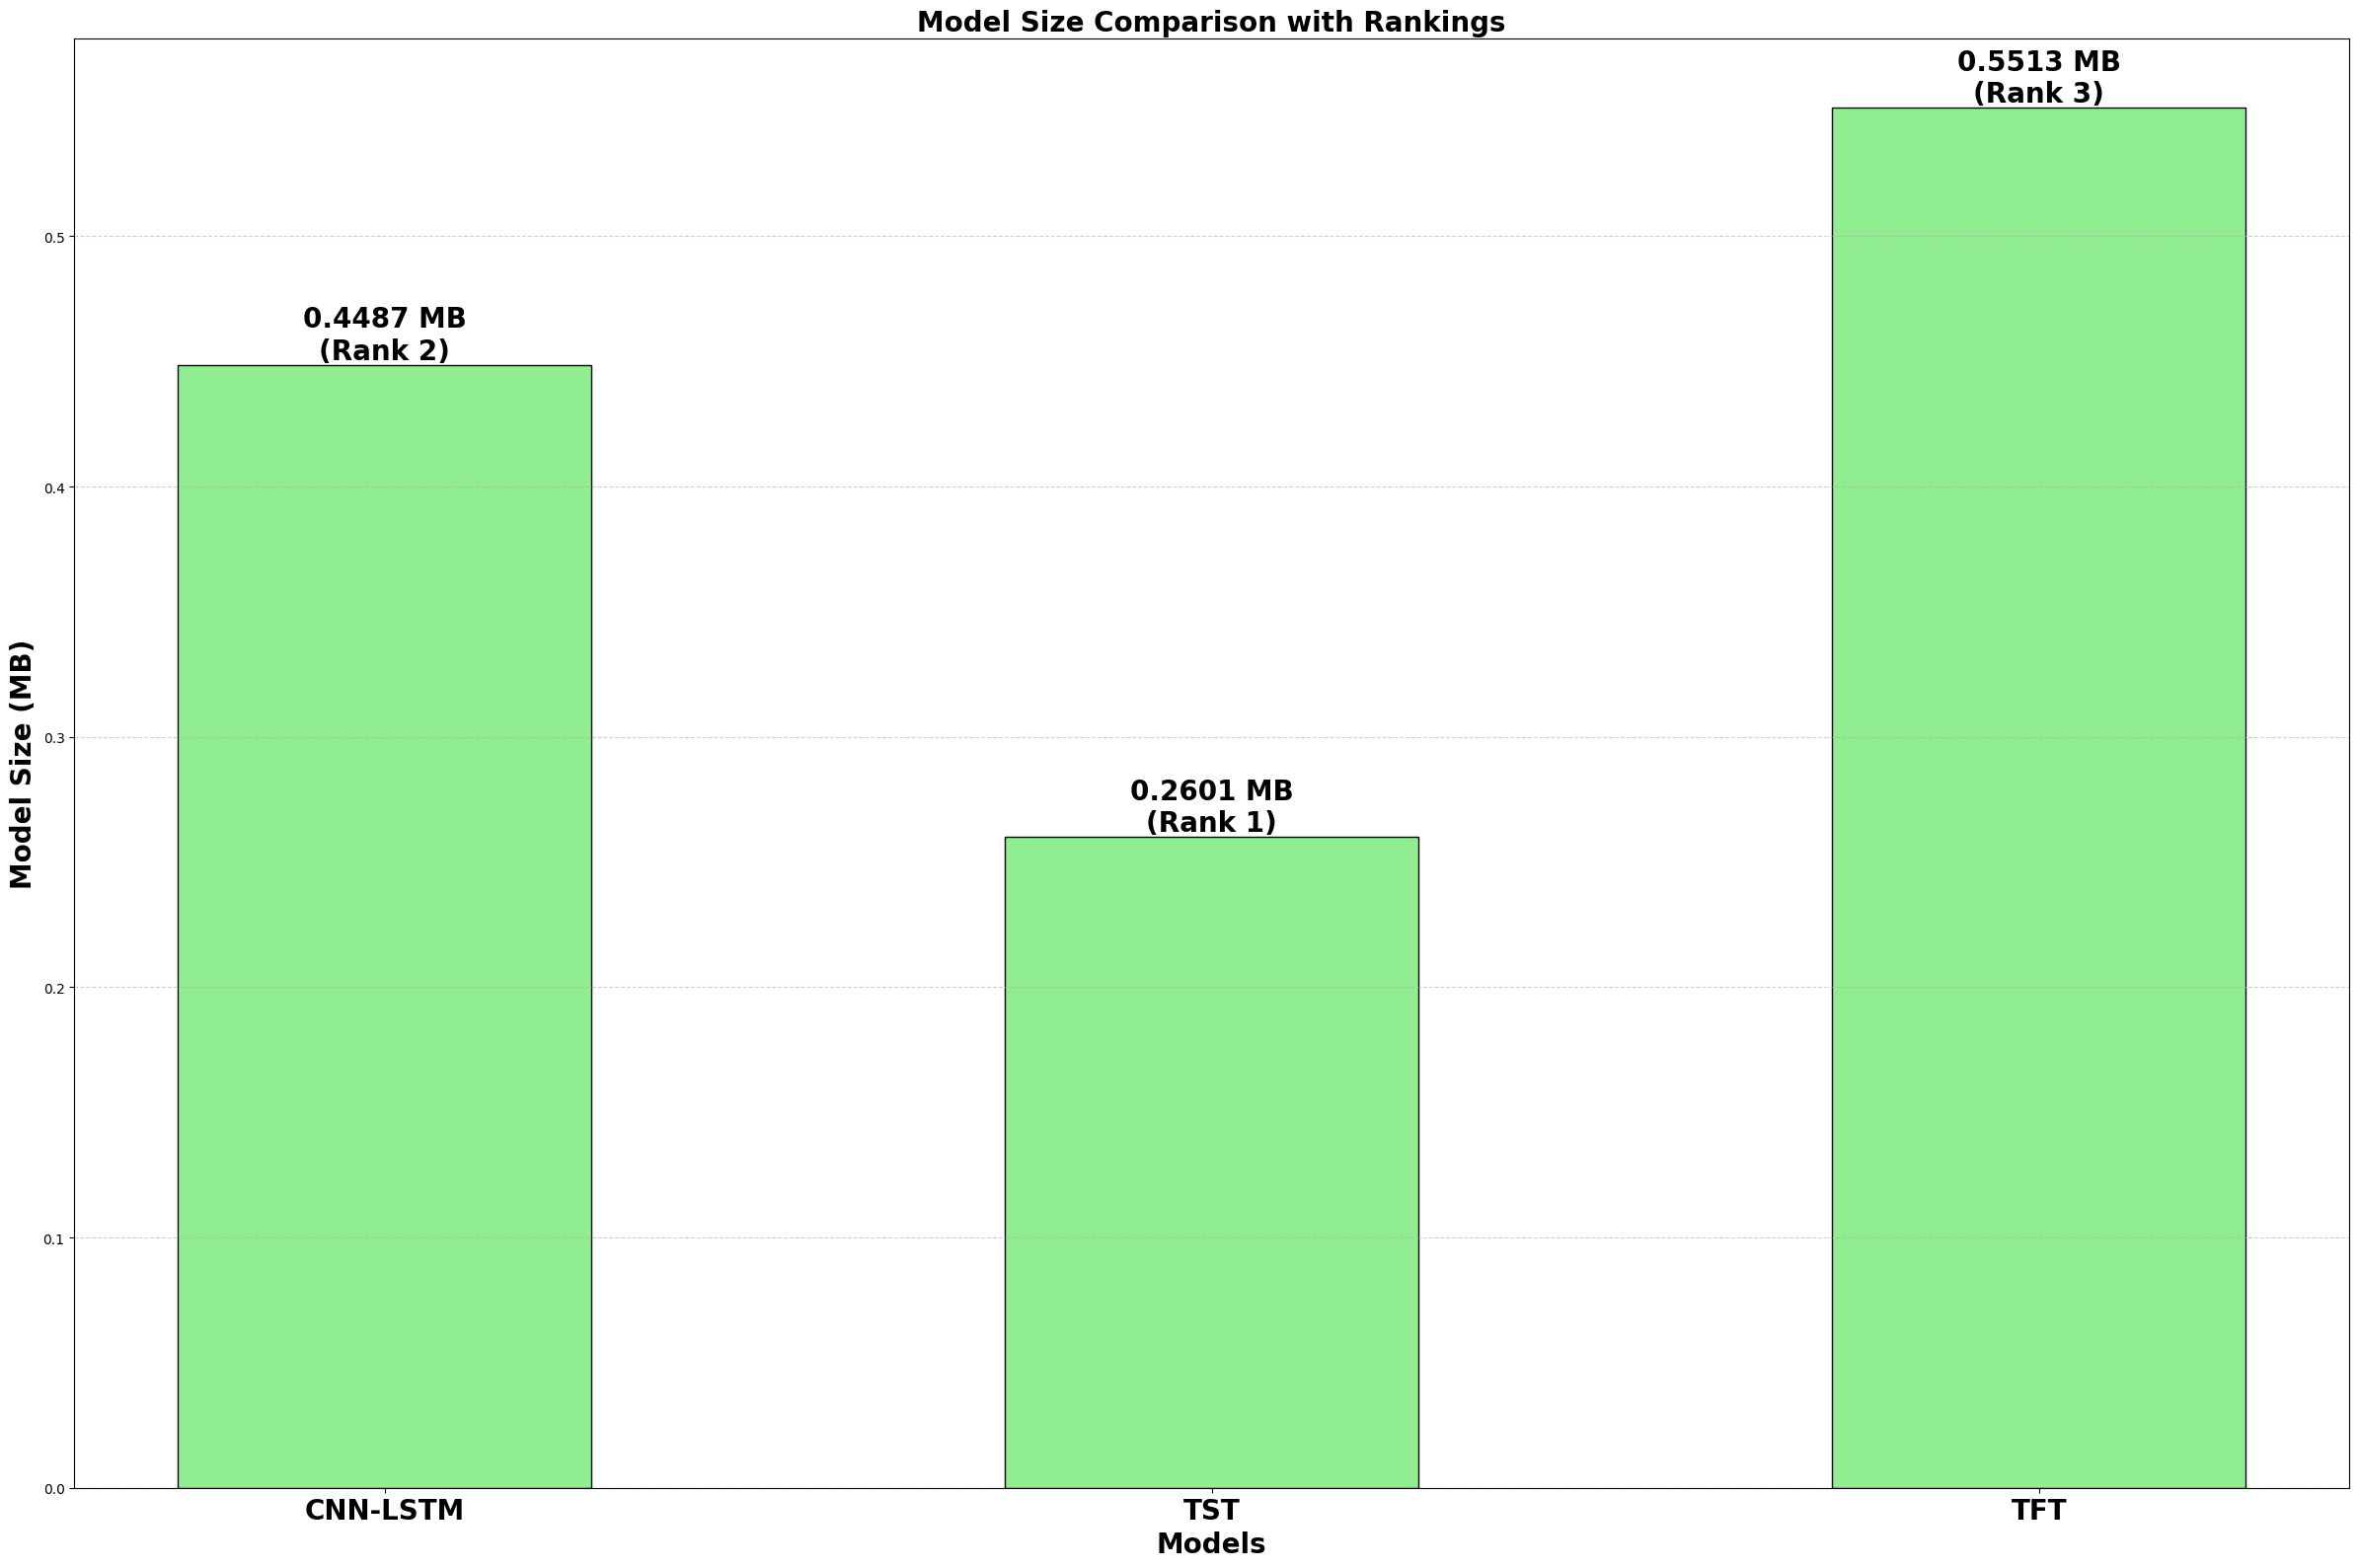

Best Model Based on Size: TST


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define models and their sizes in MB
models = ["CNN-LSTM", "TST", "TFT"]
model_sizes = [0.4487, 0.2601, 0.5513]  # Model sizes in MB

# Rank models based on size (lower is better)
size_ranks = np.argsort(model_sizes) + 1

# Find the model with the smallest size
best_model_index = np.argmin(model_sizes)
best_model = models[best_model_index]

# X-axis positions
x = np.arange(len(models))
width = 0.5  # Bar width

# Create bar chart for model sizes
fig, ax = plt.subplots(figsize=(24, 16))

bars = ax.bar(x, model_sizes, width, color='lightgreen', edgecolor='black')

# Add ranking labels on top of bars
for i, rect in enumerate(bars):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f'{height:.4f} MB\n(Rank {size_ranks[i]})',
            ha='center', va='bottom', fontsize=20, fontweight='bold')

# Formatting
ax.set_ylabel("Model Size (MB)", fontsize=20, fontweight='bold')
ax.set_xlabel("Models", fontsize=20, fontweight='bold')
ax.set_title("Model Size Comparison with Rankings", fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=20, fontweight='bold')

ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

print(f"Best Model Based on Size: {best_model}")


## Models Comparision based inference time

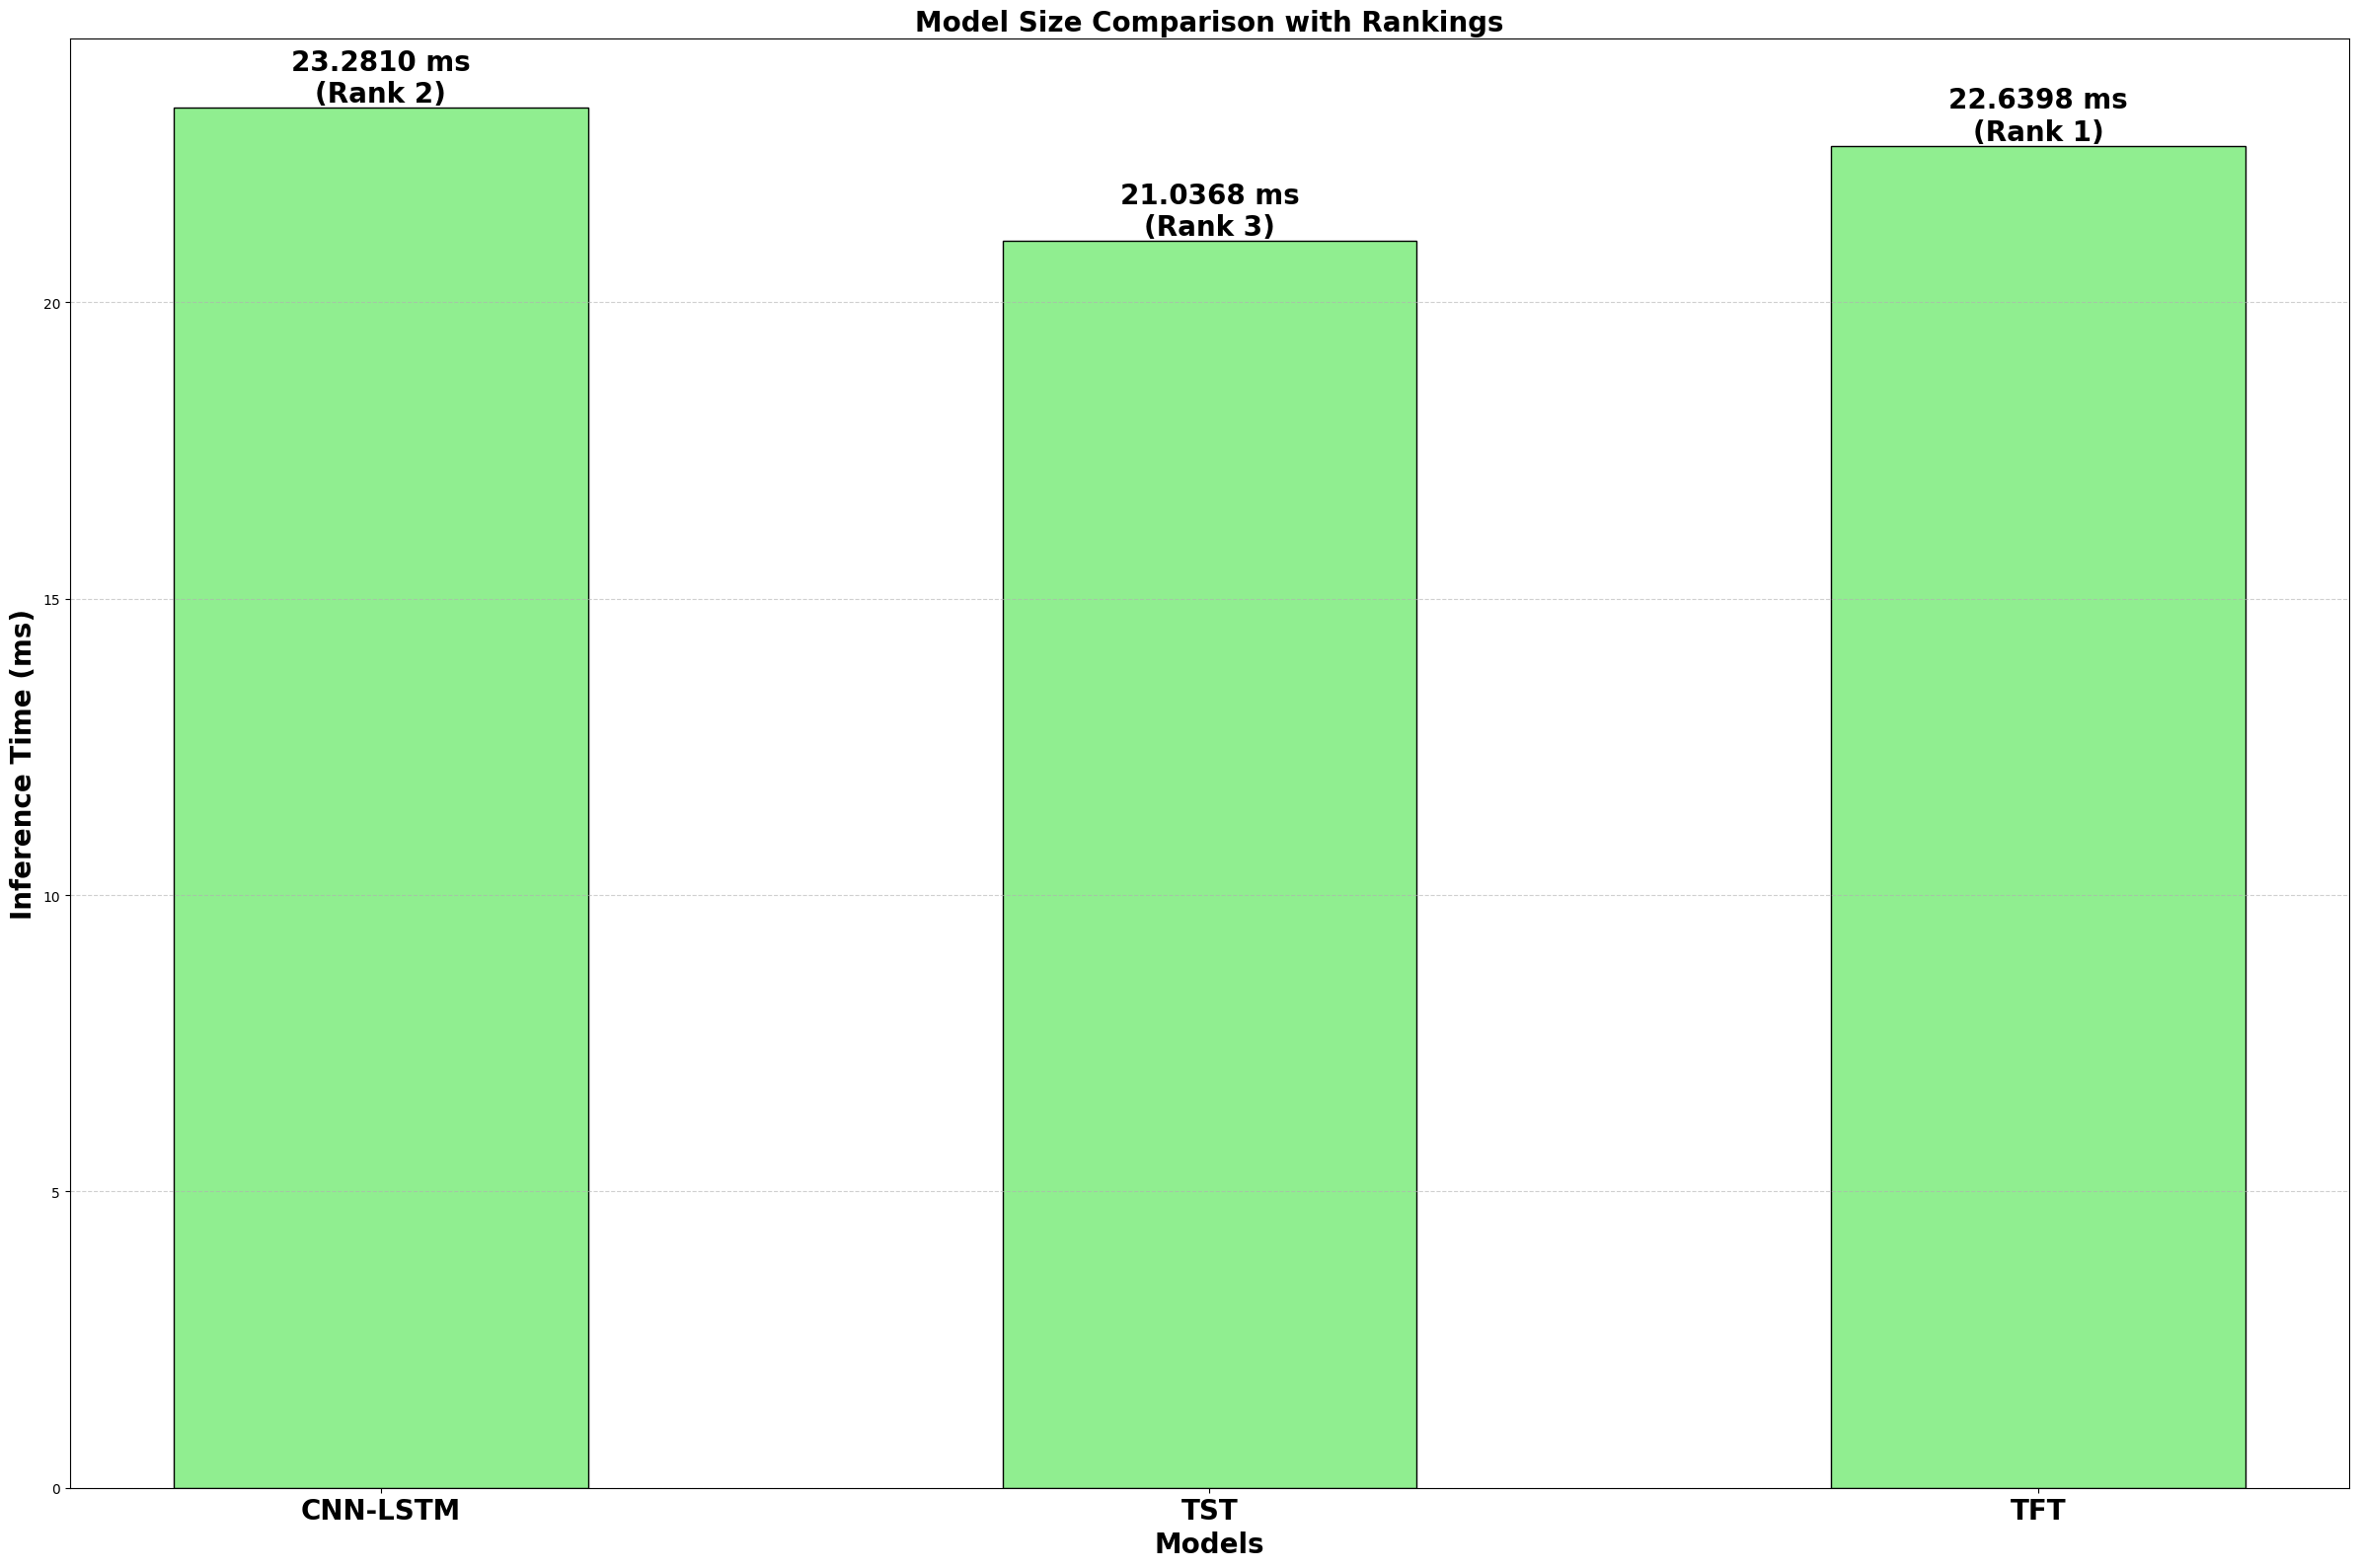

Best Model Based on Size: TST


In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define models and their sizes in MB
models = ["CNN-LSTM", "TST", "TFT"]
inference_time = [23.2810, 21.0368, 22.6398]  # Model sizes in MB

# Rank models based on size (lower is better)
size_ranks = np.argsort(inference_time) + 1

# Find the model with the smallest size
best_model_index = np.argmin(inference_time)
best_model = models[best_model_index]

# X-axis positions
x = np.arange(len(models))
width = 0.5  # Bar width

# Create bar chart for model sizes
fig, ax = plt.subplots(figsize=(24, 16))

bars = ax.bar(x, inference_time, width, color='lightgreen', edgecolor='black')

# Add ranking labels on top of bars
for i, rect in enumerate(bars):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f'{height:.4f} ms\n(Rank {size_ranks[i]})',
            ha='center', va='bottom', fontsize=20, fontweight='bold')

# Formatting
ax.set_ylabel("Inference Time (ms)", fontsize=20, fontweight='bold')
ax.set_xlabel("Models", fontsize=20, fontweight='bold')
ax.set_title("Model Size Comparison with Rankings", fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=20, fontweight='bold')

ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

print(f"Best Model Based on Size: {best_model}")
